# Profits Forecast 

In this notebook, we will be forecasting the profits for the next four years and checking against the investment target of 10% growth annually.

In [1]:
# Load the required packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the sales data as sales
sales = pd.read_excel('Sales.xlsx')

In [3]:
#confirm import
sales

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,4042,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black",610.6000,2,0.00,238.1200,57.833,Medium
1,4041,MX-2015-AB1001539-42353,2019-12-15,2019-12-19,Standard Class,AB-1001539,Aaron Bergman,Consumer,Apopa,San Salvador,...,OFF-SU-2966,Office Supplies,Supplies,"Acme Box Cutter, High Speed",151.2000,6,0.00,75.6000,10.786,Medium
2,24145,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,...,OFF-BI-6383,Office Supplies,Binders,"Wilson Jones Binding Machine, Durable",50.4600,1,0.00,22.6800,10.540,Critical
3,24144,IN-2015-AB1001558-42256,2019-09-09,2019-09-09,Same Day,AB-1001558,Aaron Bergman,Consumer,Hubli,Karnataka,...,OFF-BI-3737,Office Supplies,Binders,"Cardinal Index Tab, Clear",26.8800,4,0.00,12.0000,6.550,Critical
4,26085,ID-2015-AB1001559-42178,2019-06-23,2019-06-27,Second Class,AB-1001559,Aaron Bergman,Consumer,Palembang,Sumatera Selatan,...,FUR-FU-3935,Furniture,Furnishings,"Deflect-O Door Stop, Erganomic",372.9132,12,0.27,101.8332,53.070,Medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,31315,CA-2012-ZD21925140-41147,2016-08-26,2016-08-31,Second Class,ZD-219251404,Zuschuss Donatelli,Consumer,San Francisco,California,...,OFF-AR-5321,Office Supplies,Art,Newell 341,8.5600,2,0.00,2.4824,1.580,High
51286,18672,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,...,FUR-TA-3351,Furniture,Tables,"Barricks Round Table, with Bottom Storage",1003.0200,4,0.50,-942.9000,72.920,Medium
51287,18671,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,...,OFF-AR-3478,Office Supplies,Art,"Binney & Smith Canvas, Water Color",163.6200,3,0.00,78.4800,16.050,Medium
51288,18674,ES-2012-ZD2192564-40960,2016-02-21,2016-02-26,Standard Class,ZD-2192564,Zuschuss Donatelli,Consumer,Milan,Lombardy,...,TEC-MA-5494,Technology,Machines,"Okidata Calculator, Red",29.6640,1,0.40,-5.4660,2.410,Medium


In [4]:
# Select profit and order date from sales and call this dataset profits 
profits = sales[['Order Date', 'Profit']]

In [5]:
# Aggregate the data by order date (daily) and sum to get total profits
profits = profits.groupby('Order Date')['Profit'].sum().reset_index()

# Reset the index


# Set the index to be Order Date
profits = profits.set_index('Order Date')
profits

,Profit
Order Date,
2016-01-01,198.87300
2016-01-02,3.12000
2016-01-03,184.59720
2016-01-04,635.12344
2016-01-05,1053.36990
...,...
2019-12-27,-916.64004
2019-12-28,81.06380
2019-12-29,2046.20678


In [6]:
# Resample the profits specifiying 'MS' then sum to get a total monthly figure and call this aggprofits
aggprofits = profits['Profit'].resample('MS').sum()

In [7]:
#confirm above operation
aggprofits

Order Date
2016-01-01     8321.80096
2016-02-01    14323.06088
2016-03-01    13089.62696
2016-04-01    13211.11178
2016-05-01    14644.08230
2016-06-01    20940.59862
2016-07-01     4040.60682
2016-08-01    26452.99742
2016-09-01    35044.52286
2016-10-01    27597.95588
2016-11-01    33242.88306
2016-12-01    38031.56400
2017-01-01    10306.71254
2017-02-01    15095.02128
2017-03-01    17992.91756
2017-04-01    17366.96722
2017-05-01    29876.70374
2017-06-01    34407.15362
2017-07-01    15585.38842
2017-08-01    43573.87858
2017-09-01    27776.18034
2017-10-01    30662.88270
2017-11-01    31820.72180
2017-12-01    32950.75130
2018-01-01    26810.55968
2018-02-01    23762.49610
2018-03-01    23433.77462
2018-04-01    19462.03844
2018-05-01    28495.69410
2018-06-01    45478.41340
2018-07-01    28863.82720
2018-08-01    31023.66846
2018-09-01    38905.66778
2018-10-01    42433.22258
2018-11-01    48062.99670
2018-12-01    50202.87112
2019-01-01    28001.38626
2019-02-01    19751.69996
2

<AxesSubplot:xlabel='Order Date'>

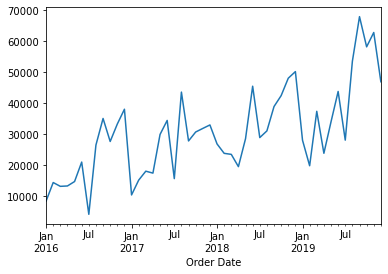

In [8]:
# Create a time plot of aggprofits
aggprofits.plot()

#we can see that there seems to be an increasing trend overall, lets break this graph into smaller components, so we can
#better understand it

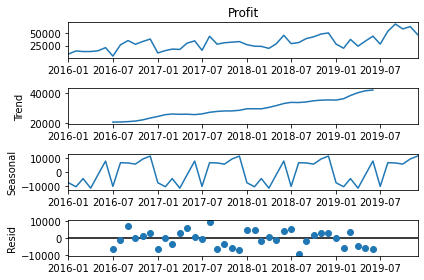

In [9]:
# Import the required package
import statsmodels.api as sm

# Examine the trend, seasonal variation and noise in sales

sm.tsa.seasonal_decompose(aggprofits).plot()
plt.show()

#we can confirm again that there is an overall increasing trend, there is also a seasonal variation where profits are negative
#at the start of the year and then briefly in July, rest of the year has positive profits. 

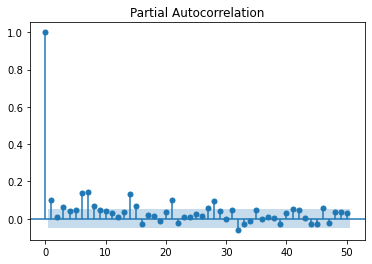

In [10]:
#lets also look at the partial autocorrelation functions

# Import the required package
from statsmodels.graphics.tsaplots import plot_pacf

# Visualise a PACF plot of profits
plot_pacf(profits, lags=50) 

plt.show() 

#The partial autocorrelations for lags 1 and 2 are statistically significant, this suggests fitting either a second or
#third-order autoregressive model

In [12]:
#lets now fit our profits data to an ARIMA model for forecasting
#first we have to find the best parameters for this model by brute force, looking for the lowest AIC number

# Import the required package
import itertools

# Run all parameters and their AIC score
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]      
            
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(aggprofits,
                                            order=param,
                                            seasonal_order=param_seasonal, 
                                           enforce_invertibility = True, enforce_stationarity = True)
            results = mod.fit()
            print('ARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

#we can see that the lowest AIC score is from the parameters 1,1,1 x 0,1,1,12

ARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:1139.0918508315722
ARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:1108.8447316804927
ARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:777.231542720959


C:\Users\Sheha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


ARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:783.4793833601095
ARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:1065.6714118797995


C:\Users\Sheha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


ARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:1065.8796041042729
ARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:778.6099816417434
ARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:770.7657168265986
ARIMA(0, 0, 1)x(0, 0, 0, 12) - AIC:1099.285892034305
ARIMA(0, 0, 1)x(0, 0, 1, 12) - AIC:1111.689542501136
ARIMA(0, 0, 1)x(0, 1, 0, 12) - AIC:771.9667394849545
ARIMA(0, 0, 1)x(0, 1, 1, 12) - AIC:773.9272008679602
ARIMA(0, 0, 1)x(1, 0, 0, 12) - AIC:1047.3217344581676
ARIMA(0, 0, 1)x(1, 0, 1, 12) - AIC:1111.631185039224
ARIMA(0, 0, 1)x(1, 1, 0, 12) - AIC:773.908861826599
ARIMA(0, 0, 1)x(1, 1, 1, 12) - AIC:775.713509791774
ARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:1019.7800857998784
ARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1019.9821069755577
ARIMA(0, 1, 0)x(0, 1, 0, 12) - AIC:756.6858361901677
ARIMA(0, 1, 0)x(0, 1, 1, 12) - AIC:745.3875999836717
ARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1015.28925906037
ARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1013.2643684103995
ARIMA(0, 1, 0)x(1, 1, 0, 12) - AIC:746.8045200696477
ARIMA(0, 1, 0)x(1, 1, 1, 12) - AIC:748.95840

C:\Users\Sheha\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(1, 0, 1, 12) - AIC:1027.9888179638897
ARIMA(1, 0, 0)x(1, 1, 0, 12) - AIC:769.2914635669538
ARIMA(1, 0, 0)x(1, 1, 1, 12) - AIC:771.1756897167777
ARIMA(1, 0, 1)x(0, 0, 0, 12) - AIC:1037.4969565711704


C:\Users\Sheha\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


ARIMA(1, 0, 1)x(0, 0, 1, 12) - AIC:1034.812186997532
ARIMA(1, 0, 1)x(0, 1, 0, 12) - AIC:772.962201014695
ARIMA(1, 0, 1)x(0, 1, 1, 12) - AIC:762.4101504772988
ARIMA(1, 0, 1)x(1, 0, 0, 12) - AIC:1031.6337594671515
ARIMA(1, 0, 1)x(1, 0, 1, 12) - AIC:1030.7584308912994
ARIMA(1, 0, 1)x(1, 1, 0, 12) - AIC:762.4647233785072
ARIMA(1, 0, 1)x(1, 1, 1, 12) - AIC:764.01891359355
ARIMA(1, 1, 0)x(0, 0, 0, 12) - AIC:1015.3358130114974
ARIMA(1, 1, 0)x(0, 0, 1, 12) - AIC:1014.6211267060453
ARIMA(1, 1, 0)x(0, 1, 0, 12) - AIC:755.9893799530743
ARIMA(1, 1, 0)x(0, 1, 1, 12) - AIC:747.1037728928189
ARIMA(1, 1, 0)x(1, 0, 0, 12) - AIC:1012.7766139744213
ARIMA(1, 1, 0)x(1, 0, 1, 12) - AIC:1011.6910273519708
ARIMA(1, 1, 0)x(1, 1, 0, 12) - AIC:746.6792505513222
ARIMA(1, 1, 0)x(1, 1, 1, 12) - AIC:747.7958909232252
ARIMA(1, 1, 1)x(0, 0, 0, 12) - AIC:1013.9411865737835
ARIMA(1, 1, 1)x(0, 0, 1, 12) - AIC:1012.5989995952525
ARIMA(1, 1, 1)x(0, 1, 0, 12) - AIC:750.0436344654306
ARIMA(1, 1, 1)x(0, 1, 1, 12) - AIC:739.20

In [13]:
# Create the selected model using parameters identified previously and call it mod1

mod1 = sm.tsa.statespace.SARIMAX(aggprofits,
order = (1, 1, 1),
seasonal_order = (0, 1, 1, 12), enforce_invertibility = True, enforce_stationarity = True)
results1 = mod1.fit()


In [14]:
# Examine the fit of the model
results1.summary()

#the p-values for the coefficients are less than 0.005 and therefore statistically significant, so fit looks good

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                             Profit   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(0, 1, 1, 12)   Log Likelihood                -365.604
Date:                            Sat, 05 Feb 2022   AIC                            739.207
Time:                                    18:11:32   BIC                            745.429
Sample:                                01-01-2016   HQIC                           741.355
                                     - 12-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4260      0.188      2.263      0.024       0.057       0.795
ma.L1         -0.9567      0.145     -6.607      0.000      -1.241      -0.673
ma.S.L12      -0.6125      0.218     -2.807      0.005      -1.040      -0.185
sigma2       6.39e+07   1.08e-09    5.9e+16      0.000    6.39e+07    6.39e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.52   Jarque-Bera (JB):                 0.55
Prob(Q):                              0.47   Prob(JB):                         0.76
Heteroskedasticity (H):               1.91   Skew:                             0.20
Prob(H) (two-sided):                  0.28   Kurtosis:                         2.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.01e+33. Standard errors may be unstable.
"""

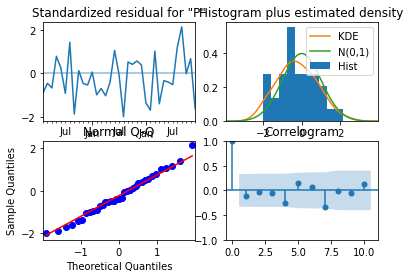

In [15]:
# Produce diagnostic plots for the model to assess its fit further
results1.plot_diagnostics()
plt.show()

#overall the diagnostics plots show that the model fits the data well. There is no strong trend in the residual plot.
#The histogram is normally distributed. The q-q plot also shows that the data is normally distributed. The correlogram
#shows that the residual errors are not autocorrelated.

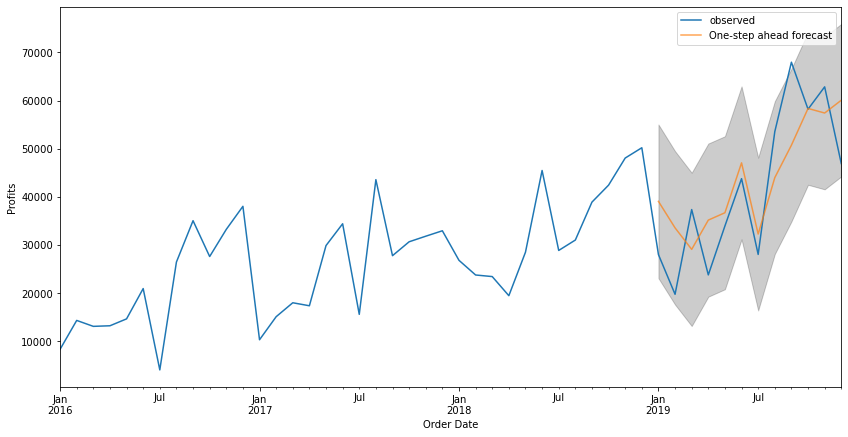

In [16]:
#Lets now compare the predicted model with the real model visually

pred1 = results1.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic = False)
pred_ci1 = pred1.conf_int() #for confidence intervals
ax = aggprofits['2016':].plot(label='observed')
pred1.predicted_mean.plot(ax=ax, label='One-step ahead forecast', alpha = .7, figsize = (14,7))
ax.fill_between(pred_ci1.index, pred_ci1.iloc[:,0], pred_ci1.iloc[:,1], color='k', alpha=.2)
ax.set_xlabel('Order Date')
ax.set_ylabel('Profits')
plt.legend()

#we can see that the predictions lie within the confidence intervals and the two lines closely follow each other.
#The predictions start with an overestimation where it varies the most, followed by an underestimation in September

In [20]:
#lets also calculate the root mean square error for this model fit (average daily profits)

import numpy as np

y_forecasted = pred1.predicted_mean
y_truth = aggprofits['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
np.sqrt(mse)

#the RMSE is 9741, which indicates that the predicted model is within 9741 of the real profits. Our predictions range from
#from 30,000 to 60,000, so this error is acceptable

9740.704912138983

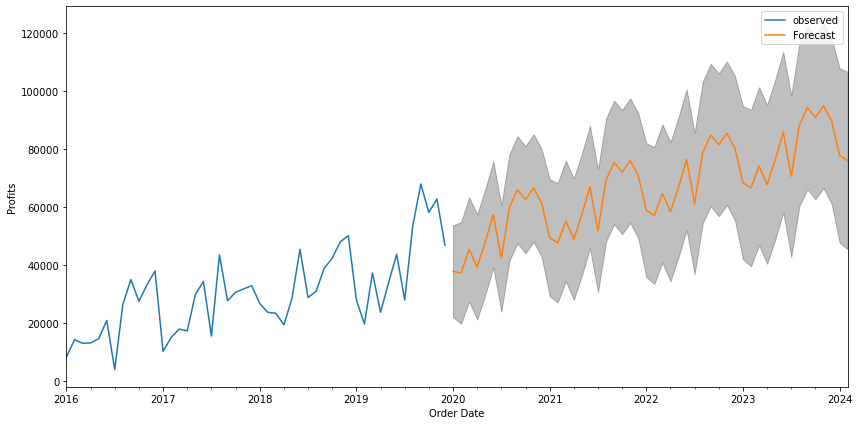

In [17]:
# Lets look at the forecast for the next four years
pred_uc = results1.get_forecast(steps=50)
pred_ci = pred_uc.conf_int()
ax = aggprofits.plot(label='observed', figsize=(14,7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index, pred_ci.iloc[:,0], pred_ci.iloc[:,1], color='k', alpha=.25)
ax.set_xlabel('Order Date')
ax.set_ylabel('Profits')
plt.legend()

#there appears to be an increasing trend in profits, which indicates that it is good for investment, lets quanity the annual
#growth next

In [33]:
#sum the predicted profits of 2020
profits2020 = pred_uc.predicted_mean[0:12].sum()
profits2020

624535.602621579

In [31]:
#sum the actual observed profits of 2019
profits2019 = aggprofits[-12:].sum()
profits2019

504165.97046

In [34]:
#calculate the predicted growth rate for 2020
gr1 = profits2020/profits2019
gr2 = gr1 - 1
gr2*100

#the growth rate is 24%, which meets the investment criteria of 10%

23.875001331754685